<a href="https://colab.research.google.com/github/Italoalberto/IA-ENAP/blob/main/VA02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Caso fictício: distribuição de recursos de saúde para a região Nordeste

In [ ]:
# Importar dependências
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Exemplo de dados históricos, fictícios no geral, mas baseados em dados populacionais reais disponíveis em:
# https://demografiaufrn.net/2023/07/12/censo-demografico-2022-reflexoes-iniciais-sobre-a-regiao-nordeste/
data ={
    'Estado': ['Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia'],
    'Mês': [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2],
    'População': [6775152, 3269200, 8791688, 3302406, 3974495, 9058155, 3127511, 2209558, 14136417, 6975152, 3169200, 8891688, 3402406, 3874495, 9358155, 3227511, 2509558, 14056417],
    'Demanda_historica': [200, 300, 250, 220, 270, 210, 310, 260, 230, 210, 310, 260, 230, 280, 220, 320, 270, 240]
    }

# Carregar os dados em um DataFrame
df = pd.DataFrame(data)

# Preparar os dados para o modelo
X = df[['Estado', 'Mês', 'População']]
y = df['Demanda_historica']

# Convertendo variáveis categóricas em numéricas
X = pd.get_dummies(X, columns=['Estado'])

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar um modelo de regressão
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Exemplo de previsão para o próximo mês
new_data = pd.DataFrame({
    'Estado': ['Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia'],
    'Mês': [3,3,3,3,3,3,3,3,3],
    'População': [6995152, 3069200, 8991688, 3502406, 3774495, 9558155, 3327511, 2709558, 14036417],
})
new_data = pd.get_dummies(new_data, columns=['Estado'])

# Garantir que as colunas de dummy estejam alinhadas
new_data = new_data.reindex(columns=X_train.columns, fill_value=0)

# Prever a demanda futura
predicted_demand = model.predict(new_data)
print("Previsão de demanda para o próximo mês por Estado:", predicted_demand)



Mean Absolute Error: 22.250000000000007
Previsão de demanda para o próximo mês por Estado: [219.6 295.  253.  235.6 272.7 229.2 263.5 275.4 236.7]


Mean Absolute Error (MAE), ou Erro Médio Absoluto, é uma métrica usada para avaliar a precisão de modelos de previsão. Ele mede a média das diferenças absolutas entre os valores previstos pelo modelo e os valores observados (reais).

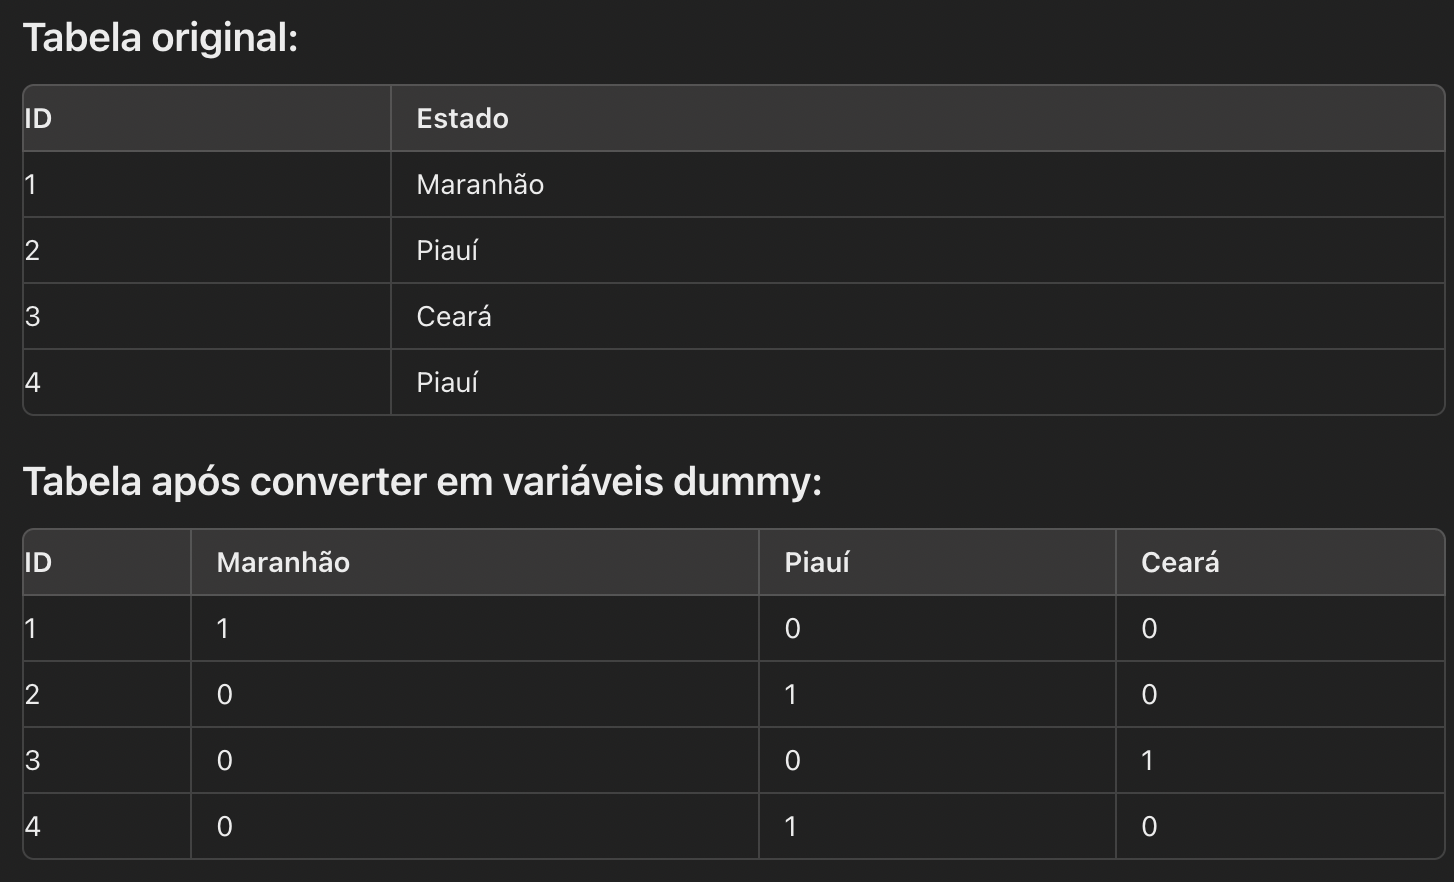